In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date

%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'cd88e02617ce437eaff56a6c687b02ff' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [4]:
players = call_api('http://api.football-data.org/v1/teams/751/players', 'players')
players

[{'contractUntil': '2019-06-30',
  'dateOfBirth': '1986-04-08',
  'jerseyNumber': 35,
  'marketValue': None,
  'name': 'Igor Akinfeev',
  'nationality': 'Russia',
  'position': 'Keeper'},
 {'contractUntil': '2019-06-30',
  'dateOfBirth': '1996-08-16',
  'jerseyNumber': 1,
  'marketValue': None,
  'name': 'Ilya Pomazun',
  'nationality': 'Russia',
  'position': 'Keeper'},
 {'contractUntil': '2019-06-30',
  'dateOfBirth': '1988-10-06',
  'jerseyNumber': 5,
  'marketValue': None,
  'name': 'Viktor Vasin',
  'nationality': 'Russia',
  'position': 'Centre-Back'},
 {'contractUntil': '2018-06-30',
  'dateOfBirth': '1982-06-20',
  'jerseyNumber': 24,
  'marketValue': None,
  'name': 'Vasili Berezutski',
  'nationality': 'Russia',
  'position': 'Centre-Back'},
 {'contractUntil': '2018-06-30',
  'dateOfBirth': '1982-06-20',
  'jerseyNumber': 6,
  'marketValue': None,
  'name': 'Aleksey Berezutski',
  'nationality': 'Russia',
  'position': 'Centre-Back'},
 {'contractUntil': '2018-06-30',
  'dateO

In [5]:
for i, player in enumerate(players):
#     player_name = (players[i]['name'], 'player_name')
    print('Игрок "{}", дата рождения - {}, конец действия контракта - {}'.format(players[i]['name'], players[i]['dateOfBirth'], players[i]['contractUntil']))

Игрок "Igor Akinfeev", дата рождения - 1986-04-08, конец действия контракта - 2019-06-30
Игрок "Ilya Pomazun", дата рождения - 1996-08-16, конец действия контракта - 2019-06-30
Игрок "Viktor Vasin", дата рождения - 1988-10-06, конец действия контракта - 2019-06-30
Игрок "Vasili Berezutski", дата рождения - 1982-06-20, конец действия контракта - 2018-06-30
Игрок "Aleksey Berezutski", дата рождения - 1982-06-20, конец действия контракта - 2018-06-30
Игрок "Sergey Ignashevich", дата рождения - 1979-07-14, конец действия контракта - 2018-06-30
Игрок "Georgi Schennikov", дата рождения - 1991-04-27, конец действия контракта - 2017-12-31
Игрок "Mário Fernandes", дата рождения - 1990-09-19, конец действия контракта - 2022-06-30
Игрок "Kirill Nababkin", дата рождения - 1986-09-08, конец действия контракта - 2019-06-30
Игрок "Pontus Wernbloom", дата рождения - 1986-06-25, конец действия контракта - 2018-06-30
Игрок "Alan Dzagoev", дата рождения - 1990-06-17, конец действия контракта - 2019-06-30

In [6]:
player_for_pd = []
for i, player in enumerate(players):
    player_for_pd.append({'name': players[i]['name'], 'dateOfBirth': players[i]['dateOfBirth'], 'contractUntil': players[i]['contractUntil']})
player_for_pd

[{'contractUntil': '2019-06-30',
  'dateOfBirth': '1986-04-08',
  'name': 'Igor Akinfeev'},
 {'contractUntil': '2019-06-30',
  'dateOfBirth': '1996-08-16',
  'name': 'Ilya Pomazun'},
 {'contractUntil': '2019-06-30',
  'dateOfBirth': '1988-10-06',
  'name': 'Viktor Vasin'},
 {'contractUntil': '2018-06-30',
  'dateOfBirth': '1982-06-20',
  'name': 'Vasili Berezutski'},
 {'contractUntil': '2018-06-30',
  'dateOfBirth': '1982-06-20',
  'name': 'Aleksey Berezutski'},
 {'contractUntil': '2018-06-30',
  'dateOfBirth': '1979-07-14',
  'name': 'Sergey Ignashevich'},
 {'contractUntil': '2017-12-31',
  'dateOfBirth': '1991-04-27',
  'name': 'Georgi Schennikov'},
 {'contractUntil': '2022-06-30',
  'dateOfBirth': '1990-09-19',
  'name': 'Mário Fernandes'},
 {'contractUntil': '2019-06-30',
  'dateOfBirth': '1986-09-08',
  'name': 'Kirill Nababkin'},
 {'contractUntil': '2018-06-30',
  'dateOfBirth': '1986-06-25',
  'name': 'Pontus Wernbloom'},
 {'contractUntil': '2019-06-30',
  'dateOfBirth': '1990-0

In [7]:
player_pd = pd.DataFrame(player_for_pd)
dateOfBirth_player = list((player_pd['dateOfBirth'].to_dict().values()))
contractUntil_player = list((player_pd['dateOfBirth'].to_dict().values()))
# print(dateOfBirth_player)

In [8]:
def get_age(birthday):
    today = date.today()
    age = today.year - (datetime.datetime.strptime(birthday, '%Y-%m-%d').year)
    return age

In [9]:
age_1 = []
for i in range (len(players)):
    age_1.append(get_age(dateOfBirth_player[i]))

In [10]:
player_pd['Age'] = player_pd.apply(lambda row: get_age(row.dateOfBirth), axis=1) 
# player_pd

In [11]:
def get_age_contractUntil(contract):
    today = date.today()
    age_2 = (datetime.datetime.strptime(contract, '%Y-%m-%d').year) - today.year
    return age_2

In [12]:
age_2 = []
for i in range (len(players)):
    age_2.append(get_age_contractUntil(contractUntil_player[i]))

In [13]:
player_pd['ContractUntil'] = player_pd.apply(lambda row: get_age_contractUntil(row.contractUntil), axis=1) 
player_pd

,contractUntil,dateOfBirth,name,Age,ContractUntil
0,2019-06-30,1986-04-08,Igor Akinfeev,31,2
1,2019-06-30,1996-08-16,Ilya Pomazun,21,2
2,2019-06-30,1988-10-06,Viktor Vasin,29,2
3,2018-06-30,1982-06-20,Vasili Berezutski,35,1
4,2018-06-30,1982-06-20,Aleksey Berezutski,35,1
5,2018-06-30,1979-07-14,Sergey Ignashevich,38,1
6,2017-12-31,1991-04-27,Georgi Schennikov,26,0
7,2022-06-30,1990-09-19,Mário Fernandes,27,5
8,2019-06-30,1986-09-08,Kirill Nababkin,31,2
9,2018-06-30,1986-06-25,Pontus Wernbloom,31,1


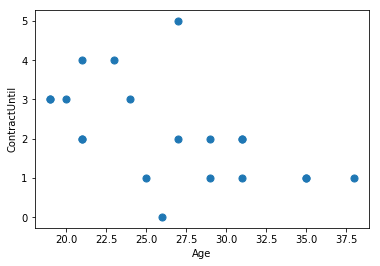

In [14]:
player_pd.plot.scatter(x='Age', y='ContractUntil', s=50)

In [15]:
del player_pd['contractUntil']
del player_pd['dateOfBirth']
del player_pd['name']
player_pd

,Age,ContractUntil
0,31,2
1,21,2
2,29,2
3,35,1
4,35,1
5,38,1
6,26,0
7,27,5
8,31,2
9,31,1


In [16]:
whitened = whiten(player_pd.as_matrix())
whitened

array([[ 5.58218865,  1.61822679],
       [ 3.78148263,  1.61822679],
       [ 5.22204744,  1.61822679],
       [ 6.30247105,  0.80911339],
       [ 6.30247105,  0.80911339],
       [ 6.84268286,  0.80911339],
       [ 4.68183564,  0.        ],
       [ 4.86190624,  4.04556697],
       [ 5.58218865,  1.61822679],
       [ 5.58218865,  0.80911339],
       [ 4.86190624,  1.61822679],
       [ 3.78148263,  3.23645358],
       [ 5.22204744,  0.80911339],
       [ 3.42134143,  2.42734018],
       [ 4.50176504,  0.80911339],
       [ 4.32169444,  2.42734018],
       [ 3.78148263,  1.61822679],
       [ 3.42134143,  2.42734018],
       [ 4.14162383,  3.23645358],
       [ 3.60141203,  2.42734018]])

In [17]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

C:\Users\user\Anaconda3\lib\site-packages\scipy\cluster\vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 3.9015297 ,  2.60714316],
        [ 5.51670843,  1.02978068],
        [ 6.68880888, -1.58892356]]),
 array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]))

In [18]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'r',
 'g',
 'g',
 'g',
 'g',
 'g',
 'r',
 'g',
 'g',
 'g',
 'r',
 'g',
 'r',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r']

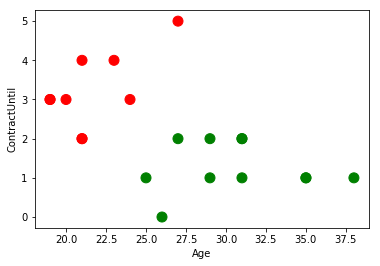

In [19]:
player_pd.plot.scatter(x='Age', y='ContractUntil', c=colors, s=100)

In [20]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

C:\Users\user\Anaconda3\lib\site-packages\scipy\cluster\vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 4.2616709 ,  3.50615804],
        [ 4.94282679,  2.59194951],
        [ 4.59180034,  2.02278349],
        [ 3.60141203,  2.10369482],
        [ 5.58218865,  0.97093607]]),
 array([4, 3, 4, 4, 4, 4, 4, 0, 4, 4, 2, 0, 4, 3, 4, 2, 3, 3, 0, 3]))

In [21]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['m',
 'y',
 'm',
 'm',
 'm',
 'm',
 'm',
 'r',
 'm',
 'm',
 'b',
 'r',
 'm',
 'y',
 'm',
 'b',
 'y',
 'y',
 'r',
 'y']

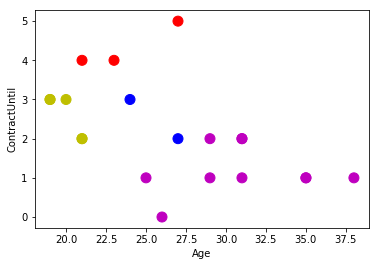

In [22]:
player_pd.plot.scatter(x='Age', y='ContractUntil', c=colors, s=100)